<a href="https://colab.research.google.com/github/kadamshwetang/Exposure-error-correction-model/blob/main/DIP_sample_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For dataset refer https://github.com/mahmoudnafifi/Exposure_Correction

In [1]:
!gdown 1YtsTeUThgD2tzF6RDwQ7Ol9VTSwqFHc_

Downloading...
From (original): https://drive.google.com/uc?id=1YtsTeUThgD2tzF6RDwQ7Ol9VTSwqFHc_
From (redirected): https://drive.google.com/uc?id=1YtsTeUThgD2tzF6RDwQ7Ol9VTSwqFHc_&confirm=t&uuid=8a5f837f-29cb-4906-bceb-46ad045a318d
To: /content/training.zip
100% 2.22G/2.22G [00:24<00:00, 90.6MB/s]


In [2]:
!gdown 1k_L2I63NpjDbhFFfHinwF7_2KjTIiipk

Downloading...
From (original): https://drive.google.com/uc?id=1k_L2I63NpjDbhFFfHinwF7_2KjTIiipk
From (redirected): https://drive.google.com/uc?id=1k_L2I63NpjDbhFFfHinwF7_2KjTIiipk&confirm=t&uuid=39a6cf5a-255a-453d-b307-57bcdb7a7307
To: /content/validation.zip
100% 102M/102M [00:00<00:00, 116MB/s] 


In [3]:
!gdown 1uxiD6-DOeLnLyI_51DUHMRxORHmUWtgz

Downloading...
From (original): https://drive.google.com/uc?id=1uxiD6-DOeLnLyI_51DUHMRxORHmUWtgz
From (redirected): https://drive.google.com/uc?id=1uxiD6-DOeLnLyI_51DUHMRxORHmUWtgz&confirm=t&uuid=a9823467-ff2e-4e07-a05f-d1f6aa78d696
To: /content/testing.zip
100% 1.40G/1.40G [00:16<00:00, 87.2MB/s]


In [4]:
import datetime

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms


In [6]:
def extract_data_from_zip(zip_file_path, extract_dir):
  """
  Extracts data from a ZIP file into the specified directory.

  Args:
    zip_file_path: Path to the ZIP file.
    extract_dir: Path to the directory where the files should be extracted.
  """
  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [11]:
import zipfile

zip_file_path = "/content/training.zip"
destination_folder = "/content/training"

extract_data_from_zip(zip_file_path, destination_folder)

In [12]:
zip_file_path = "/content/validation.zip"
destination_folder = "/content/validation"

extract_data_from_zip(zip_file_path, destination_folder)

In [13]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [23]:
validation_GT = os.listdir("/content/validation/GT_IMAGES")
validation_IN = os.listdir("/content/validation/INPUT_IMAGES")

In [31]:
training_GT = os.listdir("/content/training/GT_IMAGES")
training_IN = os.listdir("/content/training/INPUT_IMAGES")

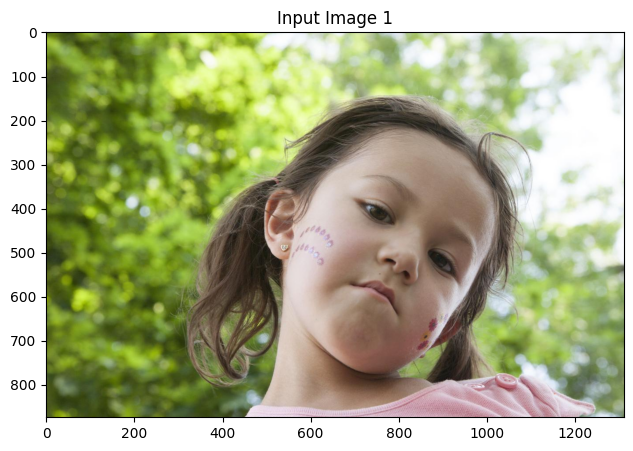

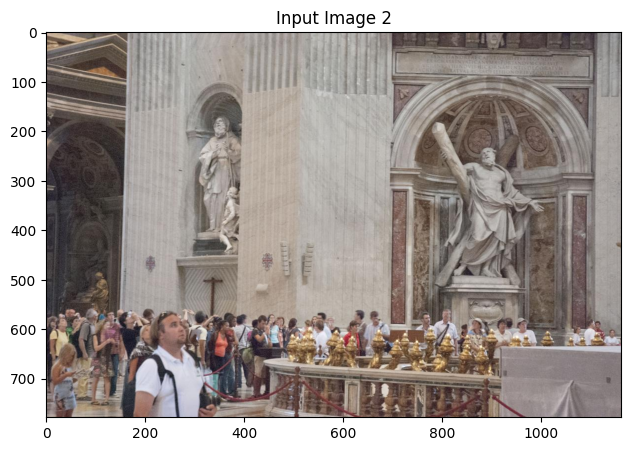

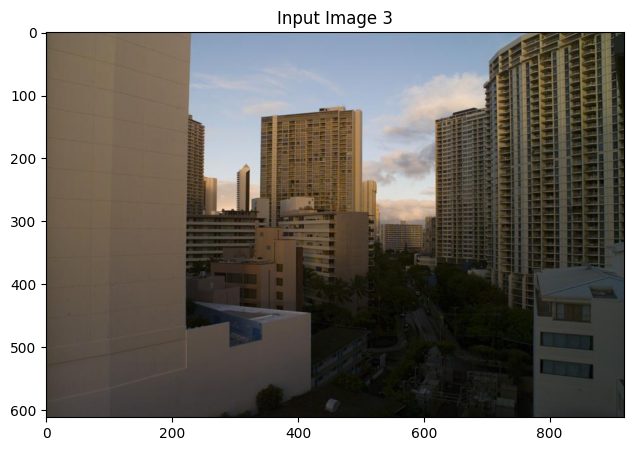

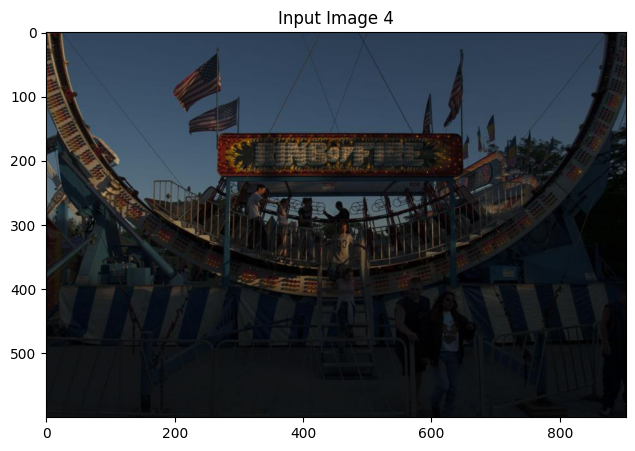

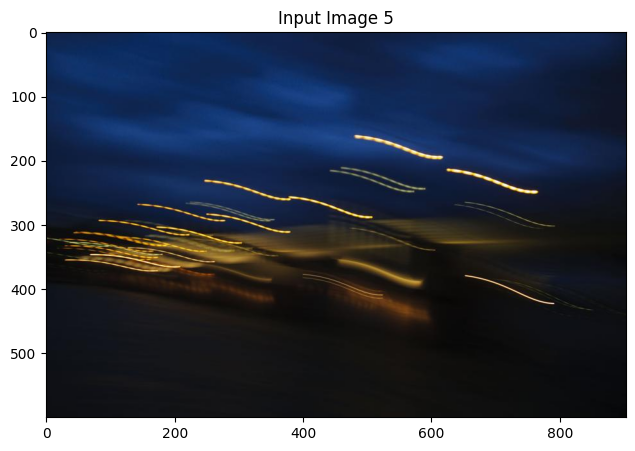

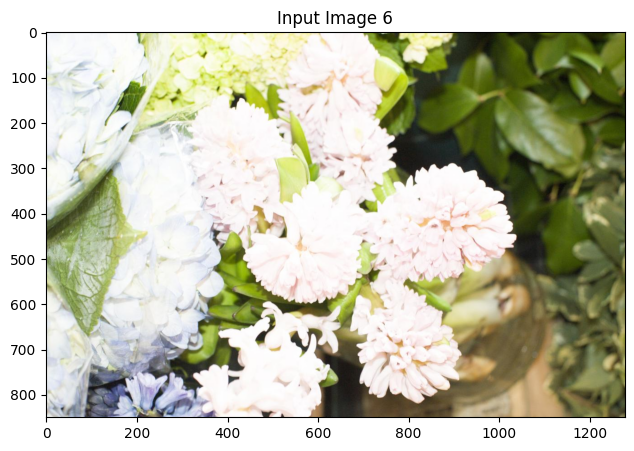

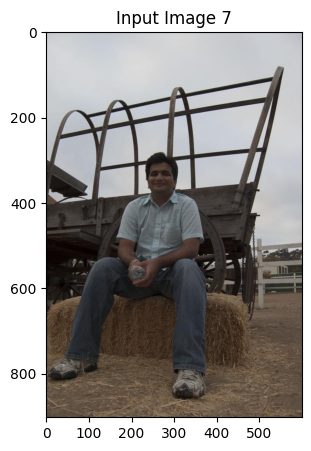

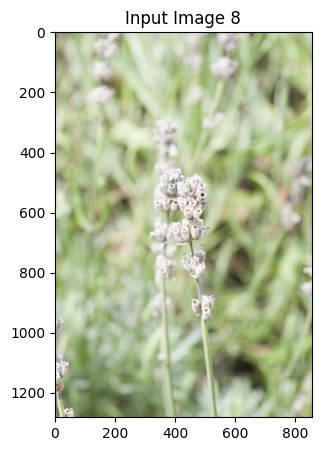

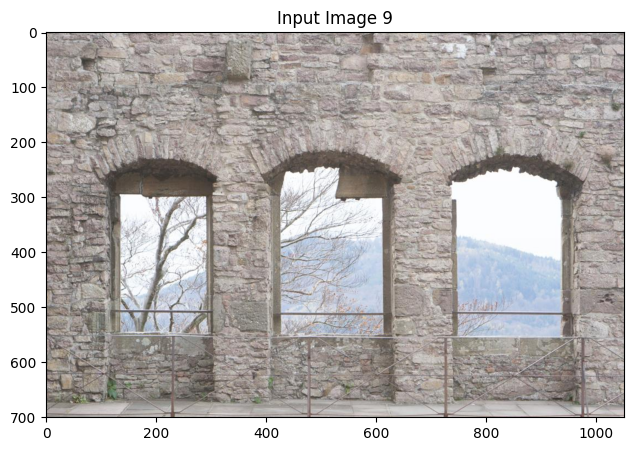

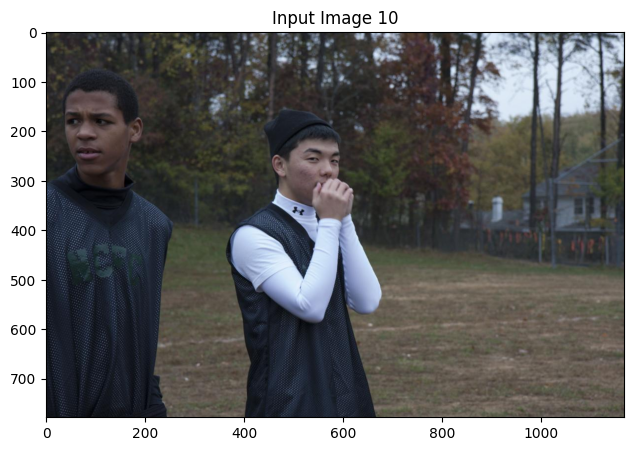

In [40]:
# Get the top 10 image filenames from each directory
training_IN_top10 = training_IN[10:]
#training_GT_top10 = training_GT[:10]

# Print the images in pairs
for i in range(10):

  input_img = mpimg.imread(os.path.join("/content/training/INPUT_IMAGES", training_IN_top10[i]))
  #gt_img = mpimg.imread(os.path.join("/content/training/GT_IMAGES", training_GT_top10[i]))

  # Display the images
  plt.figure(figsize=(10, 5))
  #plt.subplot(1, 2, 1)
  plt.imshow(input_img)
  plt.title(f"Input Image {i+1}")
  #plt.subplot(1, 2, 2)
  #plt.title(f"GT Image {i+1}")
  #plt.imshow(gt_img)
  #plt.show()
  print()

applying histogram equilisation

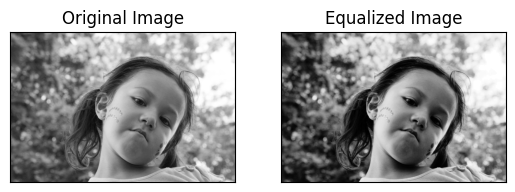

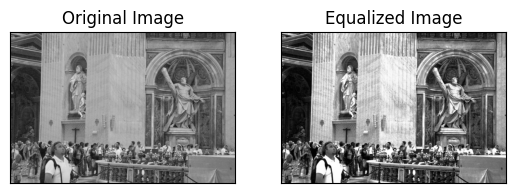

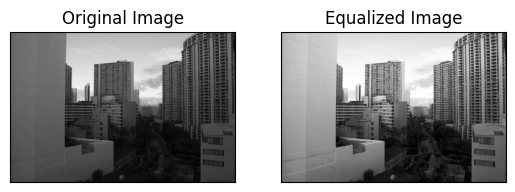

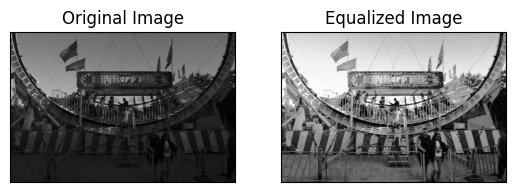

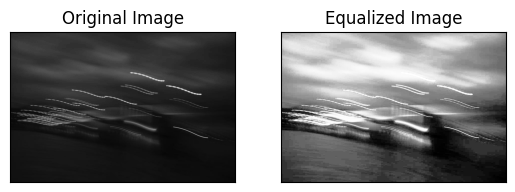

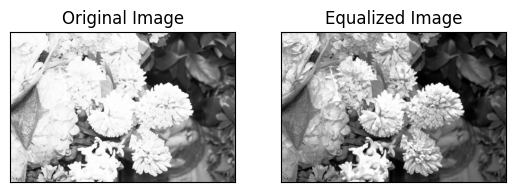

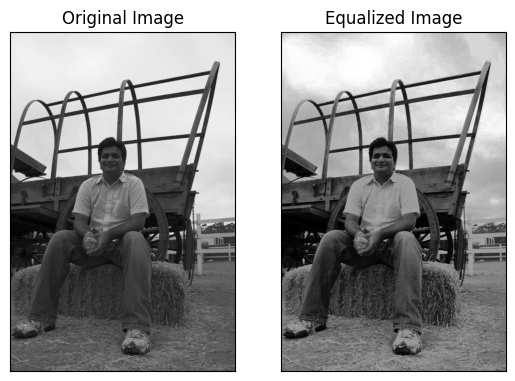

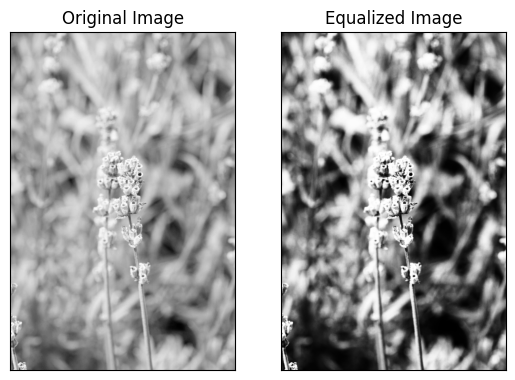

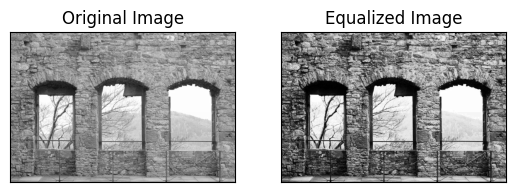

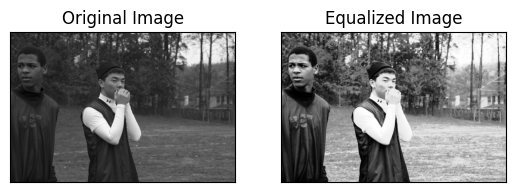

In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

training_IN_top10 = training_IN[10:]
#training_GT_top10 = training_GT[:10]

# Print the images in pairs
for i in range(10):

  img = mpimg.imread(os.path.join("/content/training/INPUT_IMAGES", training_IN_top10[i]))
  # Load the image

  # Convert the image to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Apply histogram equalization
  equ = cv2.equalizeHist(gray)

  # Show the original and equalized images
  plt.subplot(121), plt.imshow(gray, cmap='gray')
  plt.title('Original Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(equ, cmap='gray')
  plt.title('Equalized Image'), plt.xticks([]), plt.yticks([])
  plt.show()
